In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import feature_importance as fi
import data_processing as dp
import scipy as sp
import data_processing as dp
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import time
from util import timeSince

In [ ]:
from sklearn.feature_selection import SelectFpr, f_classif
import scipy.stats as stats
def diff_expressed(data_path,pvalue=0.05):
    start = time.time()
    data = pd.read_csv(data_path,sep='\t',header='infer', index_col=None)
    print(len(data.columns))
    pos_data = data.loc[data['AUC1'] == 1]
    neg_data = data.loc[data['AUC1'] == 0]
    to_drop = []
    #print(data)
    lowest_p=1
    most_DE = None
    pval_ls =[]
    for col in data.columns[1:]:
        pos = pos_data[col].values
        neg = neg_data[col].values
        if col=='CTTN':
            print('diff ',np.mean(pos)-np.mean(neg))
        if len(set(list(pos)+list(neg)))>1:
            stat,pval=stats.kruskal(pos,neg)
            pval_ls.append([col,pval])
            if pval>pvalue:
                to_drop.append(col)
                if pval<lowest_p:
                    lowest_p = pval
                    most_DE = col
        else:
            to_drop.append(col)
            
    filter_DE = data.drop(to_drop, axis=1)
    filter_DE.to_csv(data_path[:len(data_path)-4]+'.DEG'+str(pvalue)+'.tsv',sep='\t',index=False)
    print("fit done in ", timeSince(start))
    print(most_DE)
    
    pval_df = pd.DataFrame(pval_ls,columns=['gene','pval'])
    #pval_df.to_csv(data_path[:len(data_path)-4]+'.DE_pval.csv',index = False)
    return filter_DE.iloc[:,1:].values, filter_DE.iloc[:,0].values, list(filter_DE.columns)[1:]
X,Y,cols=diff_expressed('Data/PACLITAXEL_CTRP_data_p.binarizedAUC1.tsv',pvalue=0.00005)
len(cols)

In [7]:
paclitaxel_gini_ctrp = fi.forest_important_feats('Data/PACLITAXEL_CTRP_data_p.binarizedAUC1.DEG5e-05.tsv')
paclitaxel_gini_ctrp = paclitaxel_gini_ctrp.sort_values('importance',ascending=False)
#paclitaxel_gini_ctrp.to_csv('PACLITAXEL_CTRP_data_p.binarized.gini.csv',index=False)
#pvals_ctrp = pd.read_csv('Data/PACLITAXEL_CTRP_data_p.binarizedAUC1.DE_pval.csv',header='infer', index_col=None)
#pvals_ctrp[:10]

made dataset in  0m 1s
fit done in  0m 4s


In [8]:
print(len(paclitaxel_gini_ctrp['gene']))

4957


In [3]:
from scipy.stats.stats import pearsonr
genes = set(paclitaxel_gini_ctrp['gene'][:500])
x = [list(paclitaxel_gini_ctrp.loc[paclitaxel_gini_ctrp['gene'] == gene]['importance'])[0] for gene in genes]
y = [np.log(list(pvals_ctrp.loc[pvals_ctrp['gene'] == gene]['pval'])[0]) for gene in genes]
plt.scatter(x, y, alpha=0.5)
plt.xlabel('gini')
plt.ylabel('pval')
plt.title('')
plt.xlim([0,0.005])
pearsonr(x,y)

NameError: name 'pvals_ctrp' is not defined

In [4]:
path = 'Data/PACLITAXEL_CTRP_data_p.binarizedAUC1.DEG5e-05.tsv'
data = pd.read_csv(path,sep='\t',header='infer', index_col=None)
feats = list(data.columns)[1:]
ranked_feat_i=[feats.index(feat) for feat in paclitaxel_gini_ctrp['gene']]
p_accs_DE = fi.forest_feature_saturation_intervaled(path, ranked_feat_i, trials=100, steps=50, pair=None, interval=2)

made dataset in  0m 1s
[[ 7.5130e-02  7.1630e-01 -6.8240e-02 ...  2.5550e+00  3.3000e+00
   5.4380e+00]
 [-2.4340e-03  1.9150e+00 -2.7010e-02 ...  2.3480e+00  3.2050e+00
   6.2340e+00]
 [-2.4340e-03  3.2730e+00  6.5970e-01 ...  9.2700e-01  1.9630e+00
   6.7850e+00]
 ...
 [-2.4340e-03  3.2230e+00  1.2410e-01 ...  1.2640e+00  3.0860e+00
   5.0430e+00]
 [ 1.3084e-02  1.8720e+00 -1.3270e-02 ...  1.1980e+00  3.0740e+00
   6.4200e+00]
 [-2.4340e-03  1.9570e+00  6.9150e-02 ...  1.7160e+00  2.5350e+00
   6.5800e+00]]
0
spent  0m 16s
1
spent  0m 32s
2
spent  0m 48s
3
spent  1m 3s
4
spent  1m 18s
5
spent  1m 33s
6
spent  1m 50s
7
spent  2m 5s
8
spent  2m 21s
9
spent  2m 37s
10
spent  2m 53s
11
spent  3m 9s
12
spent  3m 25s
13
spent  3m 42s
14
spent  3m 58s
15
spent  4m 15s
16
spent  4m 31s
17
spent  4m 47s
18
spent  5m 2s
19
spent  5m 17s
20
spent  5m 32s
21
spent  5m 48s
22
spent  6m 3s
23
spent  6m 18s
24
spent  6m 33s
25
spent  6m 48s
26
spent  7m 4s
27
spent  7m 19s
28
spent  7m 34s
29
spent

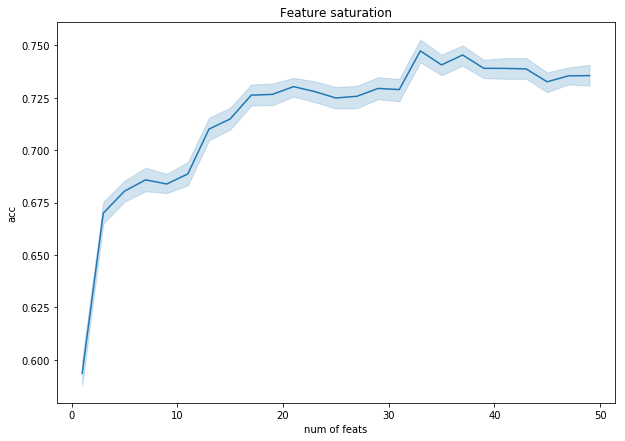

In [5]:
p_accs= p_accs_DE[0]
mean_p_accs = [sp.mean(f) for f in p_accs]
std_p_accs = [np.std(f) for f in p_accs]
p_accs_df = pd.DataFrame([[fs+1,p_accs[fs][t]] for t in range(len(p_accs[1])) for fs in range(len(p_accs))],columns=['num of feats','acc'])
p_accs_df = p_accs_df[p_accs_df.acc != 0.]
plt.subplots(figsize=(10,7))
ax = sns.lineplot(x="num of feats", y="acc", data=p_accs_df).set_title('Feature saturation')

In [5]:
docetaxel_gini_ctrp = fi.forest_important_feats('Data/DOCETAXEL_CTRP_data_p.binarizedAUC1.DEG5e-05.tsv')
docetaxel_gini_ctrp = docetaxel_gini_ctrp.sort_values('importance',ascending=False)
docetaxel_gini_ctrp
#docetaxel_gini_ctrp.to_csv('DOCETAXEL_CTRP_data_p.binarized.gini.csv',index=False)
#pvals_ctrp = pd.read_csv('DOCETAXEL_CTRP_data_p.binarizedAUC1.DE_pval.csv',header='infer', index_col=None)

made dataset in  0m 0s
fit done in  0m 2s


,gene,importance,std
0,NCEH1,0.004921,0.029545
1,PARVA,0.004031,0.027073
2,ORC1,0.003885,0.024954
3,ABLIM3,0.003736,0.023167
4,S100A11,0.003437,0.024025
5,BUB1B,0.003364,0.020151
6,GALNT11,0.003274,0.015914
7,BCL2L1,0.003093,0.016357
8,WASL,0.002962,0.021432
9,GMEB1,0.002814,0.019934


(-0.47524573610749754, 1.5471302191101947e-29)

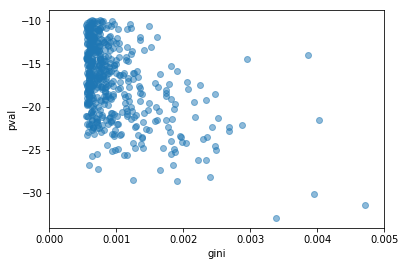

In [16]:
from scipy.stats.stats import pearsonr
genes = set(docetaxel_gini_ctrp['gene'][:500])
x = [list(docetaxel_gini_ctrp.loc[docetaxel_gini_ctrp['gene'] == gene]['importance'])[0] for gene in genes]
y = [np.log(list(pvals_ctrp.loc[pvals_ctrp['gene'] == gene]['pval'])[0]) for gene in genes]
plt.scatter(x, y, alpha=0.5)
plt.xlabel('gini')
plt.ylabel('pval')
plt.title('')
plt.xlim([0,0.005])
pearsonr(x,y)

In [17]:
path = 'Data/DOCETAXEL_CTRP_data_p.binarizedAUC1.DEG5e-05.tsv'
data = pd.read_csv(path,sep='\t',header='infer', index_col=None)
feats = list(data.columns)[1:]
ranked_feat_i=[feats.index(feat) for feat in docetaxel_gini_ctrp['gene']]
p_accs_DE = fi.forest_feature_saturation_intervaled(path, ranked_feat_i, trials=100, steps=800, pair=None, interval=80)

made dataset in  0m 0s
[[1.939  1.657  1.97   ... 4.914  2.893  1.28  ]
 [1.539  1.622  0.3398 ... 5.523  4.     0.91  ]
 [2.049  2.02   4.184  ... 4.293  0.8467 1.567 ]
 ...
 [1.362  1.021  1.12   ... 5.523  3.975  1.461 ]
 [1.838  3.121  3.312  ... 4.89   3.592  1.839 ]
 [0.886  2.02   4.95   ... 4.562  3.3    1.198 ]]
0
spent  0m 6s
1
spent  0m 12s
2
spent  0m 19s
3
spent  0m 25s
4
spent  0m 31s
5
spent  0m 37s
6
spent  0m 44s
7
spent  0m 50s
8
spent  0m 56s
9
spent  1m 2s
10
spent  1m 9s
11
spent  1m 15s
12
spent  1m 21s
13
spent  1m 27s
14
spent  1m 34s
15
spent  1m 40s
16
spent  1m 46s
17
spent  1m 53s
18
spent  1m 59s
19
spent  2m 5s
20
spent  2m 11s
21
spent  2m 18s
22
spent  2m 24s
23
spent  2m 30s
24
spent  2m 36s
25
spent  2m 43s
26
spent  2m 49s
27
spent  2m 55s
28
spent  3m 2s
29
spent  3m 8s
30
spent  3m 14s
31
spent  3m 20s
32
spent  3m 27s
33
spent  3m 33s
34
spent  3m 39s
35
spent  3m 46s
36
spent  3m 52s
37
spent  3m 58s
38
spent  4m 5s
39
spent  4m 11s
40
spent  4m 1

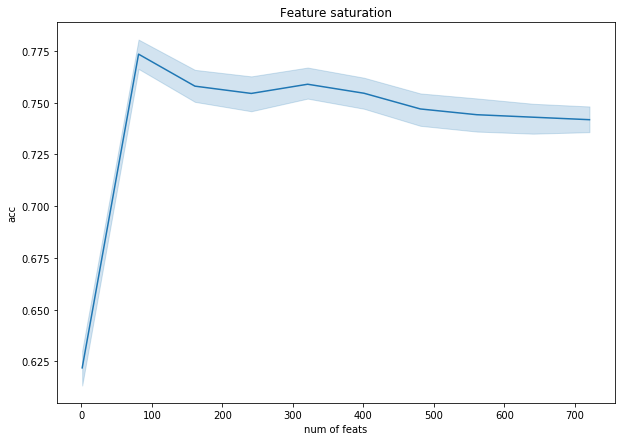

In [18]:
p_accs= p_accs_DE[0]
mean_p_accs = [sp.mean(f) for f in p_accs]
std_p_accs = [np.std(f) for f in p_accs]
p_accs_df = pd.DataFrame([[fs+1,p_accs[fs][t]] for t in range(len(p_accs[1])) for fs in range(len(p_accs))],columns=['num of feats','acc'])
p_accs_df = p_accs_df[p_accs_df.acc != 0.]
plt.subplots(figsize=(10,7))
ax = sns.lineplot(x="num of feats", y="acc", data=p_accs_df).set_title('Feature saturation')

(0.3961922719297464, 6.823007728361653e-08)

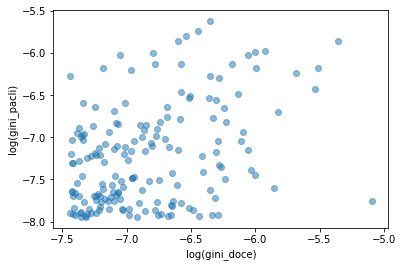

In [186]:
from scipy.stats.stats import pearsonr
genes = list(set(docetaxel_gini_ctrp['gene'][:450]).intersection(set(paclitaxel_gini_ctrp['gene'][:450])))
x = [np.log(list(docetaxel_gini_ctrp.loc[docetaxel_gini_ctrp['gene'] == gene]['importance'])[0]) for gene in genes]
y = [np.log(list(paclitaxel_gini_ctrp.loc[paclitaxel_gini_ctrp['gene'] == gene]['importance'])[0]) for gene in genes]
plt.scatter(x, y, alpha=0.5)
plt.xlabel('log(gini_doce)')
plt.ylabel('log(gini_pacli)')
plt.title('')
#plt.xlim([0,0.005])
#plt.ylim([0,0.005])
pearsonr(x,y)

In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import preprocessing
path = 'Data/PACLITAXEL_CTRP_data_p.binarizedAUC1.DEG5e-05.tsv'
clf = LinearDiscriminantAnalysis()
X, y, feats = dp.get_data(path)
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)
coefs = clf.coef_[0]
gene_coefs = [[feats[i],coefs[i]] for i in range(len(feats))]
gene_coefs = pd.DataFrame(gene_coefs,columns=['gene','lda_coeff'])

/home/annambiar/.local/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [69]:
clf.score(X_test, y_test)

0.777027027027027

(-0.06439694906678768, 0.15047711751419265)

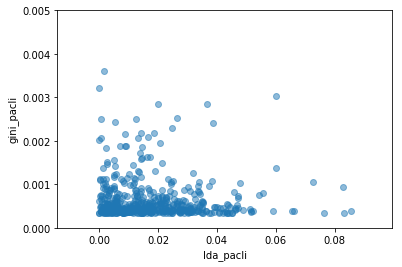

In [71]:
from scipy.stats.stats import pearsonr
genes = set(paclitaxel_gini_ctrp['gene'][:500])
x = [abs(list(gene_coefs.loc[gene_coefs['gene'] == gene]['lda_coeff'])[0]) for gene in genes]
y = [list(paclitaxel_gini_ctrp.loc[paclitaxel_gini_ctrp['gene'] == gene]['importance'])[0] for gene in genes]
plt.scatter(x, y, alpha=0.5)
plt.xlabel('lda_pacli')
plt.ylabel('gini_pacli')
plt.title('')
#plt.xlim([0,0.005])
plt.ylim([0,0.005])
pearsonr(x,y)

In [72]:
genes = list(gene_coefs['gene'])
df = pd.DataFrame(genes, columns=['Genes'])
df.insert(loc=1,column = 'Pacli Gini', value=[list(paclitaxel_gini_ctrp.loc[paclitaxel_gini_ctrp['gene'] == gene]['importance'])[0] if gene in list(paclitaxel_gini_ctrp['gene']) else 0 for gene in genes])
df.insert(loc=2,column ='Doce Gini', value = [list(docetaxel_gini_ctrp.loc[docetaxel_gini_ctrp['gene'] == gene]['importance'])[0] if gene in list(docetaxel_gini_ctrp['gene']) else 0 for gene in genes])
df.insert(loc=3,column = 'Abs LDA coeff', value=[abs(list(gene_coefs.loc[gene_coefs['gene'] == gene]['lda_coeff'])[0]) if gene in list(gene_coefs['gene']) else 0 for gene in genes])
df.to_csv('Pacli_Doce_genes.csv',index=False)

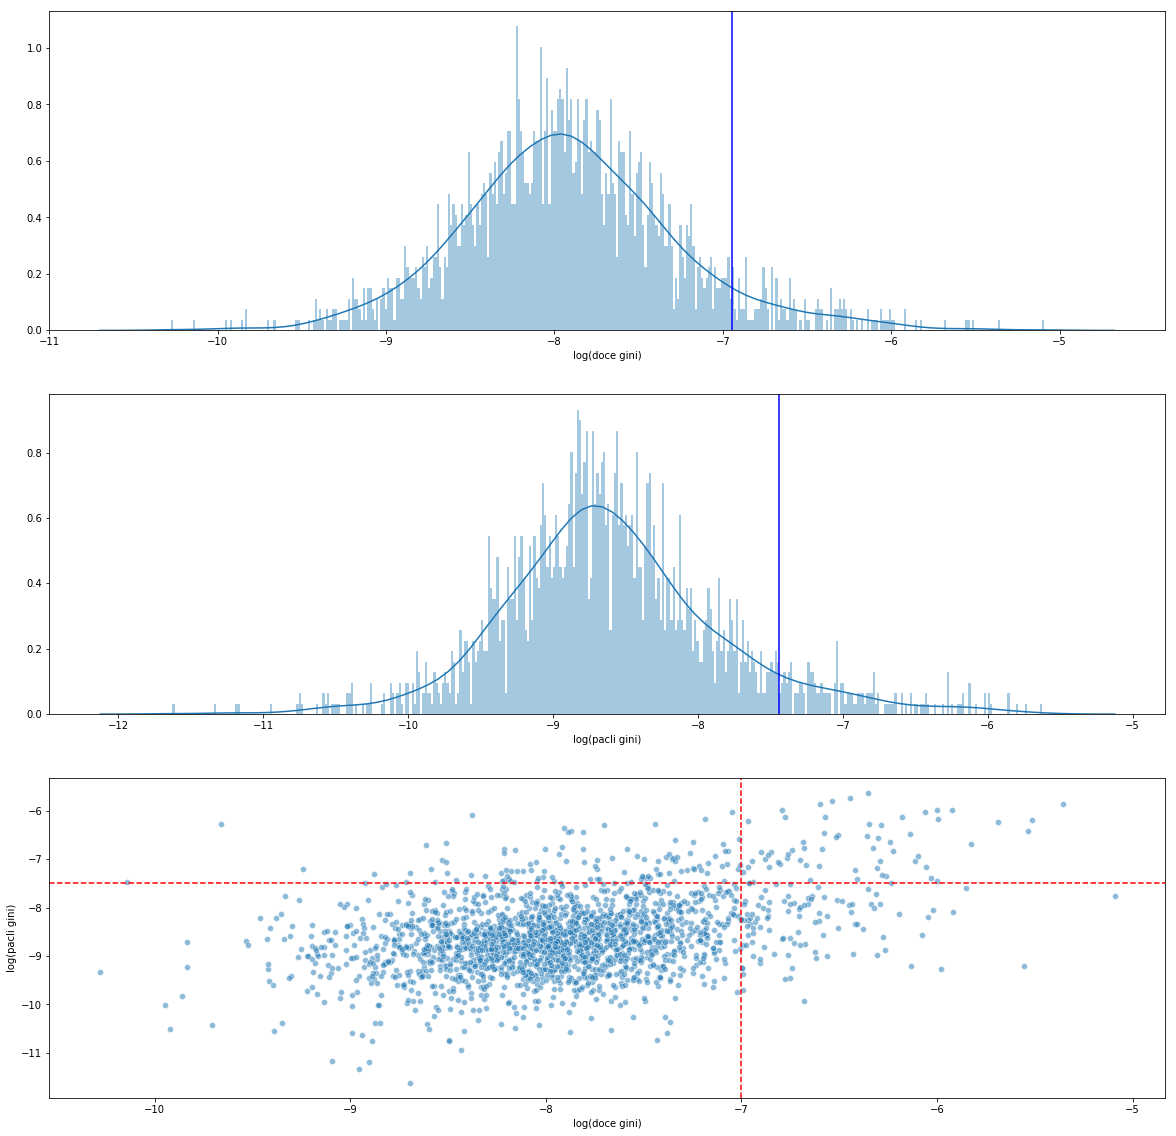

In [107]:
genes = list(set(docetaxel_gini_ctrp['gene']).intersection(set(paclitaxel_gini_ctrp['gene'])))
x = [np.log(list(docetaxel_gini_ctrp.loc[docetaxel_gini_ctrp['gene'] == gene]['importance'])[0]) for gene in genes]
y = [np.log(list(paclitaxel_gini_ctrp.loc[paclitaxel_gini_ctrp['gene'] == gene]['importance'])[0]) for gene in genes]
data = pd.DataFrame()
data['gene'] = genes
data['log(doce gini)'] = x
data['log(pacli gini)'] = y
fig, ax =plt.subplots(3,1,figsize=(20,20))
i=0
for col in data.columns[1:3]:
    #print(data[col])
    sns.distplot(data[col], ax=ax[i], bins=400)
    ax[i].axvline(np.mean(data[col])+1.5*np.std(data[col]), color='blue')
    i+=1
sns.scatterplot(x='log(doce gini)',y='log(pacli gini)',data=data,alpha=0.5,ax=ax[2])
ax[2].axhline(-7.5, color="red", linestyle="--")
ax[2].axvline(-7, color="red", linestyle="--")

YpacYdoce = data.loc[(data['log(doce gini)'] >= -7) & (data['log(pacli gini)'] >= -7.5)]
YpacYdoce.to_csv('gini_YpacYdoce.csv',index=False)
YpacNdoce = data.loc[(data['log(doce gini)'] < -7) & (data['log(pacli gini)'] >= -7.5)]
YpacNdoce.to_csv('gini_YpacNdoce.csv',index=False)
NpacYdoce = data.loc[(data['log(doce gini)'] >= -7) & (data['log(pacli gini)'] < -7.5)]
NpacYdoce.to_csv('gini_NpacYdoce.csv',index=False)
NpacNdoce = data.loc[(data['log(doce gini)'] < -7) & (data['log(pacli gini)'] < -7.5)]
NpacNdoce.to_csv('gini_NpacNdoce.csv',index=False)

In [106]:
YpacYdoce = data.loc[(data['log(doce gini)'] >= -7) & (data['log(pacli gini)'] >= -7.5)]
print(YpacYdoce[:10])
YpacNdoce = data.loc[(data['log(doce gini)'] < -7) & (data['log(pacli gini)'] >= -7.5)]
print(YpacNdoce[:10])
NpacYdoce = data.loc[(data['log(doce gini)'] >= -7) & (data['log(pacli gini)'] < -7.5)]
print(NpacYdoce[:10])
NpacNdoce = data.loc[(data['log(doce gini)'] < -7) & (data['log(pacli gini)'] < -7.5)]
print(NpacNdoce[:10])

        gene  log(doce gini)  log(pacli gini)
33      MLPH       -6.235249        -7.495823
51    TM4SF1       -6.777507        -6.126378
64     PARVA       -5.533937        -6.421729
67   FAM129B       -6.329210        -6.771866
153    MMP24       -6.538653        -5.798771
157     ASPH       -6.350457        -6.272608
166     CTTN       -6.447211        -5.739856
238    ITGA3       -6.575162        -6.133688
240   IL17RC       -6.743230        -6.817299
250     GRPR       -6.859277        -7.164327
        gene  log(doce gini)  log(pacli gini)
1      LYPD1       -8.082404        -7.091950
7       TJP1       -7.485519        -7.384848
80     GPR39       -7.807724        -6.789960
83     NOP14       -8.180922        -7.453145
117    TRNP1       -7.171170        -7.083783
127  SLC2A10       -7.097323        -7.143529
144     PDK4       -7.068377        -6.835561
180   CC2D2A       -8.074970        -7.220084
186     DAG1       -8.115940        -7.241852
229    RBPMS       -8.004916      

In [130]:
paclitaxel_perm_ctrp = pd.read_csv('PACLITAXEL_CTRP_data_p.binarizedAUC1.DEG5e-05.perm.csv')
pvals_ctrp = pd.read_csv('Data/PACLITAXEL_CTRP_data_p.binarizedAUC1.DE_pval.csv',header='infer', index_col=None)
paclitaxel_perm_ctrp[:10]

,gene,importance,std
0,WAC,0.004414,0.000631
1,TMEM14C,0.004234,0.001070
2,FBXO46,0.004234,0.001070
3,ABHD17B,0.004189,0.001149
4,DHX32,0.004144,0.001222
5,TRIM65,0.004144,0.001222
6,ME2,0.004009,0.001409
7,RPL22,0.004009,0.001409
8,CDK5RAP2,0.004009,0.001409
9,RPL12,0.003964,0.001464


(-0.1674385272038455, 0.0001690636244205137)

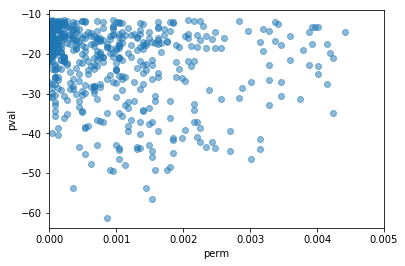

In [134]:
from scipy.stats.stats import pearsonr
genes = set(paclitaxel_perm_ctrp['gene'][:500])
x = [list(paclitaxel_perm_ctrp.loc[paclitaxel_perm_ctrp['gene'] == gene]['importance'])[0] for gene in genes]
y = [np.log(list(pvals_ctrp.loc[pvals_ctrp['gene'] == gene]['pval'])[0]) for gene in genes]
plt.scatter(x, y, alpha=0.5)
plt.xlabel('perm')
plt.ylabel('pval')
plt.title('')
plt.xlim([0.000,0.005])
pearsonr(x,y)

In [114]:
path = 'Data/PACLITAXEL_CTRP_data_p.binarizedAUC1.DEG5e-05.tsv'
data = pd.read_csv(path,sep='\t',header='infer', index_col=None)
feats = list(data.columns)[1:]
ranked_feat_i=[feats.index(feat) for feat in paclitaxel_perm_ctrp['gene']]
p_accs_DE = fi.forest_feature_saturation_intervaled(path, ranked_feat_i, trials=100, steps=800, pair=None, interval=80)

made dataset in  0m 1s
[[ 7.5130e-02  7.1630e-01 -6.8240e-02 ...  2.5550e+00  3.3000e+00
   5.4380e+00]
 [-2.4340e-03  1.9150e+00 -2.7010e-02 ...  2.3480e+00  3.2050e+00
   6.2340e+00]
 [-2.4340e-03  3.2730e+00  6.5970e-01 ...  9.2700e-01  1.9630e+00
   6.7850e+00]
 ...
 [-2.4340e-03  3.2230e+00  1.2410e-01 ...  1.2640e+00  3.0860e+00
   5.0430e+00]
 [ 1.3084e-02  1.8720e+00 -1.3270e-02 ...  1.1980e+00  3.0740e+00
   6.4200e+00]
 [-2.4340e-03  1.9570e+00  6.9150e-02 ...  1.7160e+00  2.5350e+00
   6.5800e+00]]
0
spent  0m 8s
1
spent  0m 16s
2
spent  0m 23s
3
spent  0m 31s
4
spent  0m 39s
5
spent  0m 46s
6
spent  0m 54s
7
spent  1m 1s
8
spent  1m 8s
9
spent  1m 16s
10
spent  1m 23s
11
spent  1m 31s
12
spent  1m 38s
13
spent  1m 46s
14
spent  1m 53s
15
spent  2m 1s
16
spent  2m 8s
17
spent  2m 16s
18
spent  2m 23s
19
spent  2m 31s
20
spent  2m 38s
21
spent  2m 46s
22
spent  2m 53s
23
spent  3m 1s
24
spent  3m 8s
25
spent  3m 16s
26
spent  3m 23s
27
spent  3m 31s
28
spent  3m 38s
29
spent 

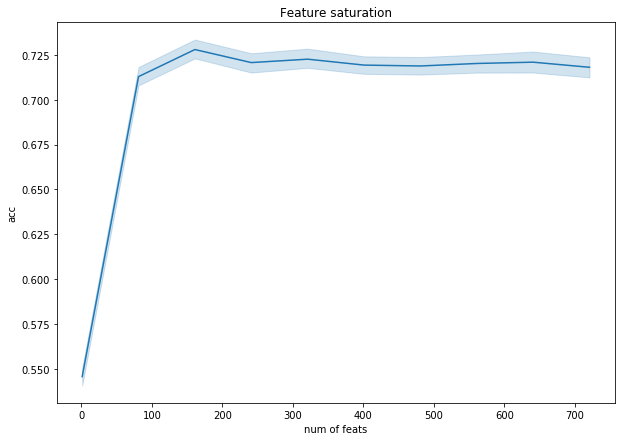

In [115]:
p_accs= p_accs_DE[0]
mean_p_accs = [sp.mean(f) for f in p_accs]
std_p_accs = [np.std(f) for f in p_accs]
p_accs_df = pd.DataFrame([[fs+1,p_accs[fs][t]] for t in range(len(p_accs[1])) for fs in range(len(p_accs))],columns=['num of feats','acc'])
p_accs_df = p_accs_df[p_accs_df.acc != 0.]
plt.subplots(figsize=(10,7))
ax = sns.lineplot(x="num of feats", y="acc", data=p_accs_df).set_title('Feature saturation')

In [135]:
docetaxel_perm_ctrp = pd.read_csv('DOCETAXEL_CTRP_data_p.binarizedAUC1.DEG5e-05.tsv.perm.csv')
pvals_ctrp = pd.read_csv('DOCETAXEL_CTRP_data_p.binarizedAUC1.DE_pval.csv',header='infer', index_col=None)
docetaxel_perm_ctrp[:10]

,gene,importance,std
0,SNX24,0.024630,0.009093
1,CTNND1,0.014537,0.005439
2,GOLGA8A,0.014352,0.009919
3,KCNAB2,0.013519,0.005465
4,SHC2,0.013056,0.007646
5,MAP4K3,0.012963,0.007747
6,NDC1,0.012685,0.008552
7,MTO1,0.012037,0.005478
8,GPR63,0.012037,0.007349
9,AK5,0.011944,0.005446


(-0.09477322335924518, 0.020241148146837737)

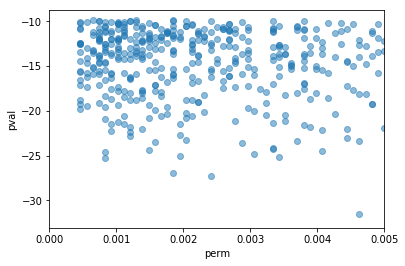

In [183]:
from scipy.stats.stats import pearsonr
genes = set(docetaxel_perm_ctrp['gene'][:600])
x = [list(docetaxel_perm_ctrp.loc[docetaxel_perm_ctrp['gene'] == gene]['importance'])[0] for gene in genes]
y = [np.log(list(pvals_ctrp.loc[pvals_ctrp['gene'] == gene]['pval'])[0]) for gene in genes]
plt.scatter(x, y, alpha=0.5)
plt.xlabel('perm')
plt.ylabel('pval')
plt.title('')
plt.xlim([-0,0.005])
pearsonr(x,y)

In [140]:
path = 'Data/DOCETAXEL_CTRP_data_p.binarizedAUC1.DEG5e-05.tsv'
data = pd.read_csv(path,sep='\t',header='infer', index_col=None)
feats = list(data.columns)[1:]
ranked_feat_i=[feats.index(feat) for feat in docetaxel_perm_ctrp['gene']]
p_accs_DE = fi.forest_feature_saturation_intervaled(path, ranked_feat_i, trials=100, steps=800, pair=None, interval=80)

made dataset in  0m 0s
[[1.939  1.657  1.97   ... 4.914  2.893  1.28  ]
 [1.539  1.622  0.3398 ... 5.523  4.     0.91  ]
 [2.049  2.02   4.184  ... 4.293  0.8467 1.567 ]
 ...
 [1.362  1.021  1.12   ... 5.523  3.975  1.461 ]
 [1.838  3.121  3.312  ... 4.89   3.592  1.839 ]
 [0.886  2.02   4.95   ... 4.562  3.3    1.198 ]]
0
spent  0m 6s
1
spent  0m 12s
2
spent  0m 20s
3
spent  0m 26s
4
spent  0m 32s
5
spent  0m 38s
6
spent  0m 45s
7
spent  0m 51s
8
spent  0m 57s
9
spent  1m 3s
10
spent  1m 10s
11
spent  1m 16s
12
spent  1m 22s
13
spent  1m 28s
14
spent  1m 35s
15
spent  1m 41s
16
spent  1m 47s
17
spent  1m 53s
18
spent  2m 0s
19
spent  2m 6s
20
spent  2m 12s
21
spent  2m 18s
22
spent  2m 25s
23
spent  2m 31s
24
spent  2m 37s
25
spent  2m 43s
26
spent  2m 50s
27
spent  2m 56s
28
spent  3m 2s
29
spent  3m 9s
30
spent  3m 15s
31
spent  3m 21s
32
spent  3m 27s
33
spent  3m 34s
34
spent  3m 40s
35
spent  3m 46s
36
spent  3m 52s
37
spent  3m 59s
38
spent  4m 5s
39
spent  4m 11s
40
spent  4m 1

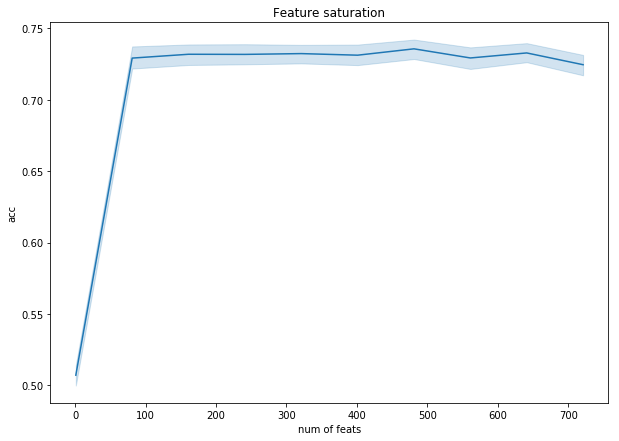

In [141]:
p_accs= p_accs_DE[0]
mean_p_accs = [sp.mean(f) for f in p_accs]
std_p_accs = [np.std(f) for f in p_accs]
p_accs_df = pd.DataFrame([[fs+1,p_accs[fs][t]] for t in range(len(p_accs[1])) for fs in range(len(p_accs))],columns=['num of feats','acc'])
p_accs_df = p_accs_df[p_accs_df.acc != 0.]
plt.subplots(figsize=(10,7))
ax = sns.lineplot(x="num of feats", y="acc", data=p_accs_df).set_title('Feature saturation')

(-0.1121176384978618, 0.3554491826506122)

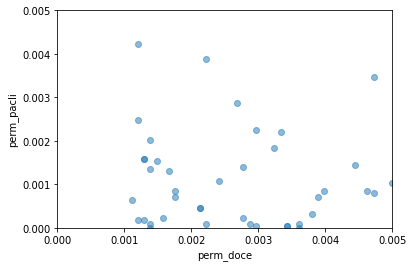

In [189]:
from scipy.stats.stats import pearsonr
genes = list(set(docetaxel_perm_ctrp['gene'][:500]).intersection(set(paclitaxel_perm_ctrp['gene'][:500])))
x = [list(docetaxel_perm_ctrp.loc[docetaxel_perm_ctrp['gene'] == gene]['importance'])[0] for gene in genes]
y = [list(paclitaxel_perm_ctrp.loc[paclitaxel_perm_ctrp['gene'] == gene]['importance'])[0] for gene in genes]
plt.scatter(x, y, alpha=0.5)
plt.xlabel('perm_doce')
plt.ylabel('perm_pacli')
plt.title('')
plt.xlim([0,0.005])
plt.ylim([0,0.005])
pearsonr(x,y)

In [153]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import preprocessing
path = 'Data/PACLITAXEL_CTRP_data_p.binarizedAUC1.DEG5e-05.tsv'
clf = LinearDiscriminantAnalysis()
X, y, feats = dp.get_data(path)
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)
coefs = clf.coef_[0]
gene_coefs = [[feats[i],coefs[i]] for i in range(len(feats))]
gene_coefs = pd.DataFrame(gene_coefs,columns=['gene','lda_coeff'])

/home/annambiar/.local/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [154]:
clf.score(X_test, y_test)

0.6891891891891891

(-0.003354565452427571, 0.9403556751171354)

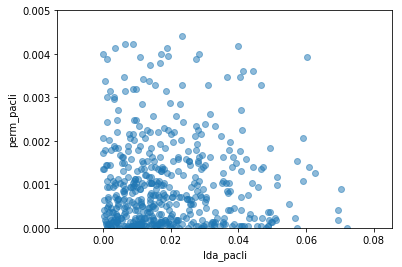

In [157]:
from scipy.stats.stats import pearsonr
genes = set(paclitaxel_perm_ctrp['gene'][:500])
x = [abs(list(gene_coefs.loc[gene_coefs['gene'] == gene]['lda_coeff'])[0]) for gene in genes]
y = [list(paclitaxel_perm_ctrp.loc[paclitaxel_perm_ctrp['gene'] == gene]['importance'])[0] for gene in genes]
plt.scatter(x, y, alpha=0.5)
plt.xlabel('lda_pacli')
plt.ylabel('perm_pacli')
plt.title('')
#plt.xlim([0,0.005])
plt.ylim([0,0.005])
pearsonr(x,y)

In [158]:
genes = list(set(docetaxel_perm_ctrp['gene'][:450]).intersection(set(paclitaxel_perm_ctrp['gene'][:450])))
df = pd.DataFrame(genes, columns=['Genes'])
df.insert(loc=1,column = 'Pacli Perm', value=[list(paclitaxel_perm_ctrp.loc[paclitaxel_perm_ctrp['gene'] == gene]['importance'])[0] for gene in genes])
df.insert(loc=2,column ='Doce Perm', value = [list(docetaxel_perm_ctrp.loc[docetaxel_perm_ctrp['gene'] == gene]['importance'])[0] for gene in genes])
df.insert(loc=3,column = 'Abs LDA coeff', value=[abs(list(gene_coefs.loc[gene_coefs['gene'] == gene]['lda_coeff'])[0]) for gene in genes])
df.to_csv('Pacli_Doce_intersect_genes_perm.csv',index=False)

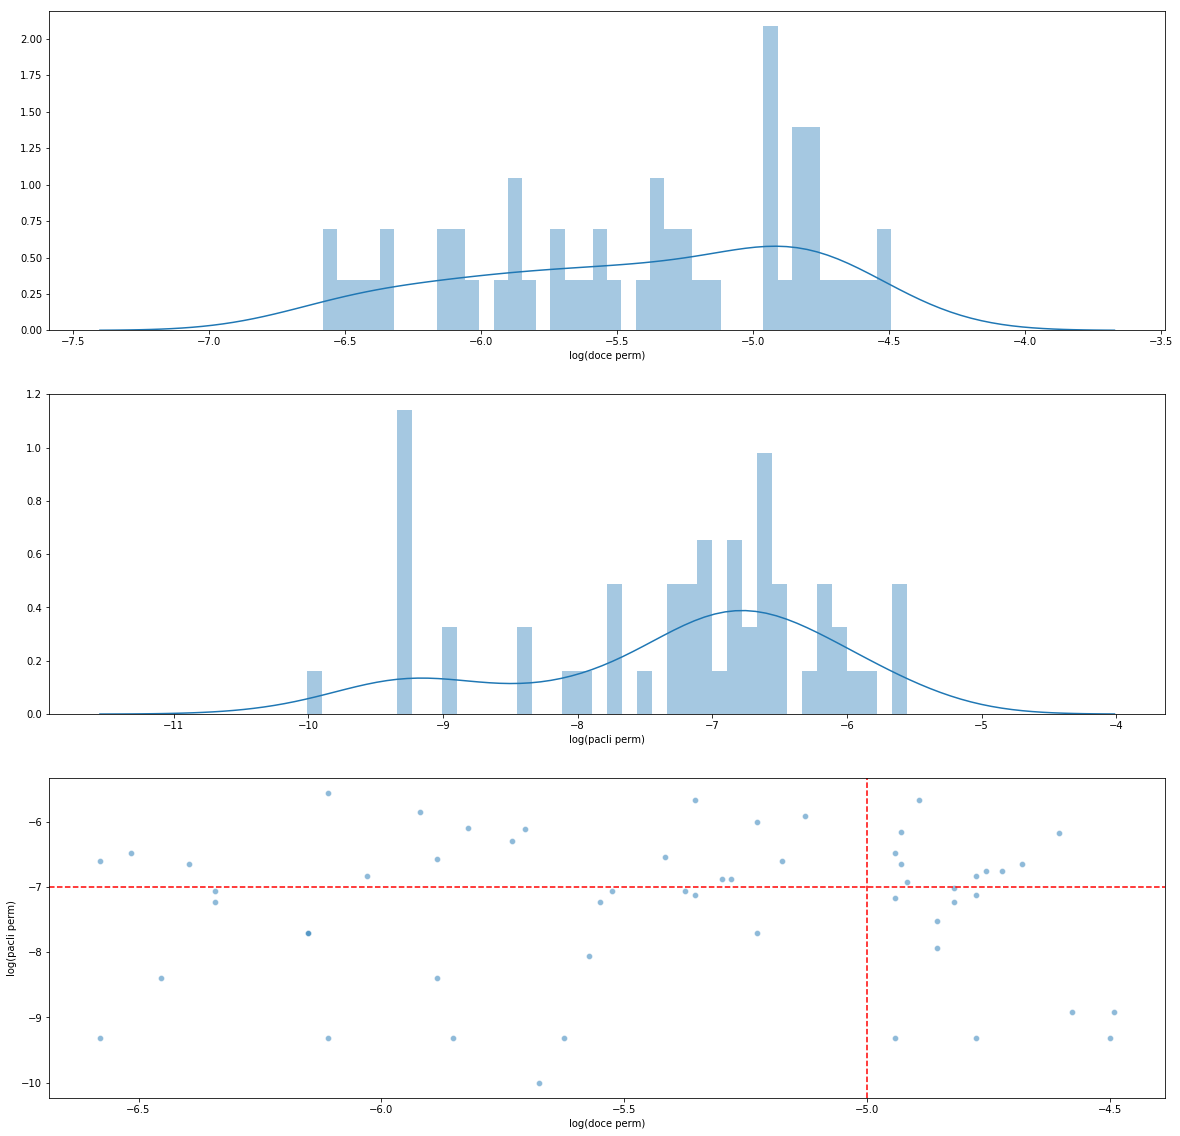

In [178]:
genes = list(set(docetaxel_perm_ctrp['gene'][:450]).intersection(set(paclitaxel_perm_ctrp['gene'][:450])))
x = [np.log(list(docetaxel_perm_ctrp.loc[docetaxel_perm_ctrp['gene'] == gene]['importance'])[0]) for gene in genes]
y = [np.log(list(paclitaxel_perm_ctrp.loc[paclitaxel_perm_ctrp['gene'] == gene]['importance'])[0]) for gene in genes]
data = pd.DataFrame()
data['gene'] = genes
data['log(doce perm)'] = x
data['log(pacli perm)'] = y
#print(genes)
fig, ax =plt.subplots(3,1,figsize=(20,20))
i=0
for col in data.columns[1:3]:
    #print(data[col])
    sns.distplot(data[col], ax=ax[i], bins=40)
    #ax[i].axvline(np.mean(data[col])+1*np.std(data[col]), color='blue')
    i+=1
sns.scatterplot(x='log(doce perm)',y='log(pacli perm)',data=data,alpha=0.5,ax=ax[2])
ax[2].axhline(-7, color="red", linestyle="--")
ax[2].axvline(-5, color="red", linestyle="--")

YpacYdoce = data.loc[(data['log(doce perm)'] >= -5) & (data['log(pacli perm)'] >= -7)]
YpacYdoce.to_csv('perm_YpacYdoce.csv',index=False)
YpacNdoce = data.loc[(data['log(doce perm)'] < -5) & (data['log(pacli perm)'] >= -7)]
YpacNdoce.to_csv('perm_YpacNdoce.csv',index=False)
NpacYdoce = data.loc[(data['log(doce perm)'] >= -5) & (data['log(pacli perm)'] < -7)]
NpacYdoce.to_csv('perm_NpacYdoce.csv',index=False)
NpacNdoce = data.loc[(data['log(doce perm)'] < -5) & (data['log(pacli perm)'] < -7)]
NpacNdoce.to_csv('perm_NpacNdoce.csv',index=False)

In [208]:
YpacYdoce = pd.read_csv('gini_NpacYdoce.csv')
#YpacYdocec = YpacYdoce.copy()
#YpacYdocec['average'] = YpacYdocec.mean(numeric_only=True, axis=1)
sortedDf = YpacYdoce.sort_values(by='log(doce gini)',ascending=False)
#sortedDf=sortedDf.drop(columns=['average'])
#sortedDf
sortedDf.to_csv('gini_NpacYdoce_sorted.csv')

Given $m$ trees and $n$ features,

$\bar{p}=P(\text{feature i is not selected}) = \frac{((n-1)(n-2))^m}{n^m}$

$P(k $ features not selected$)$

In [213]:
df= pd.read_csv('Data/DOCETAXEL_CTRP_data.txt',sep='\t',header='infer', index_col=None)
df2 = df[['Sample','AUC1']]
df2.to_csv('DOCETAXEL_CTRP_sample_AUC.csv')

In [227]:
def train_rf(data_path,skl_classifier,pair=None,num_feats=None):
    start = time.time()
    if pair!= None:
        X, y, feats = dp.pair_features(data_path, pair)
    else:
        X, y, feats = dp.get_data(data_path)
    print("made dataset in ", timeSince(start))
    
    accs = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    skl_classifier.fit(X_train, y_train)
    print("fit done in ", timeSince(start))
    #accs.append(skl_classifier.score(X_test, y_test))
        
    return skl_classifier, X_test, y_test

rf, Xs, ys = train_rf('Data/PACLITAXEL_CTRP_data_p.binarizedAUC1.DEG5e-05.tsv',RandomForestClassifier(n_estimators=1000, n_jobs=8,max_features=200,oob_score=True))

made dataset in  0m 1s
fit done in  0m 8s


Text(0.5, 1.0, 'Distribution of accuracies')

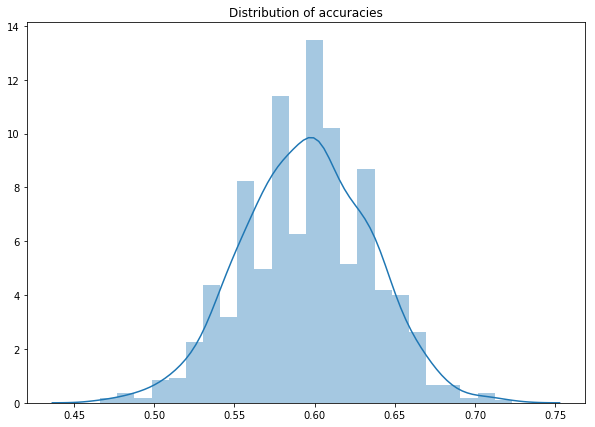

In [231]:
accs = [tree.score(Xs,ys) for tree in rf.estimators_]
plt.subplots(figsize=(10,7))
sns.distplot(accs).set_title('Distribution of accuracies')

In [229]:
rf.score(Xs,ys)

0.6891891891891891

Text(0.5, 1.0, 'Distribution of accuracies')

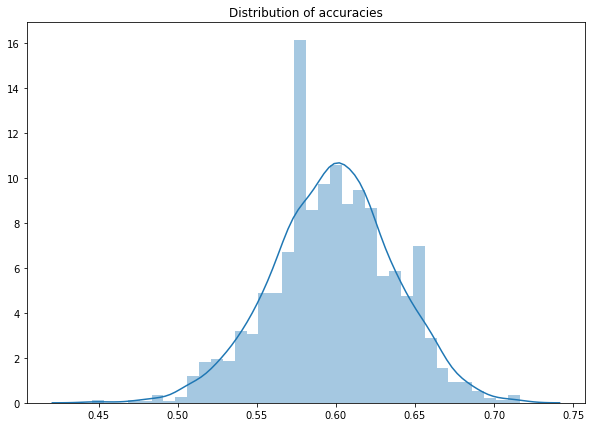

In [221]:
accs = [tree.score(Xs,ys) for tree in rf.estimators_]
plt.subplots(figsize=(10,7))
sns.distplot(accs).set_title('Distribution of accuracies')